In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import h5py
import glob 
from scipy import interpolate
import json
import os
import sys
from NuRadioReco.utilities import units
from NuRadioReco.detector import detector
from NuRadioMC.utilities import fluxes
from NuRadioMC.utilities.Veff import get_Veff_Aeff, get_Veff_Aeff_array, get_index, get_Veff_water_equivalent
#from my_Veff import get_Veff_Aeff, get_Veff_Aeff_array, get_index, get_Veff_water_equivalent
from NuRadioMC.examples.Sensitivities import E2_fluxes3 as limits
from Get_hdf5_data import get_attr_data, get_shower_data, get_station_data, get_Veff_data, get_event_data, get_nur_data
from Peak_Finding import count_peak, get_noise, save_data_2_csv, read_column_csv, get_noise_and_peak_from_bin
import numpy as np
import matplotlib.pyplot as plt
from NuRadioReco.utilities import units
import NuRadioReco.detector.detector as detector
import NuRadioReco.modules.io.eventReader
import astropy
from NuRadioReco.framework.parameters import stationParameters as stnp
import pandas as pd
from math import isclose
import mplhep as hep




PATH = "/home/teikiet/Data/"
##########################################################################
S_ID = [100,2, 3, 4, 5] #station ID
C_ID = list(range(0,16)) #channel ID
##########################################################################
threshold = 3.4 #threshold
bin_size = 11 #bin size aka time interval x0.625 ns
sample_size = 800 #the time interval for peak detection x0.625ns
E = 18 #energy
num =  1e4 #number of particles
detectordescription = "detector/ara2.json" #detector 
##########################################################################
#Nur path:
inputfilename1 = PATH + f"sims_monopoles_ara2_n1.000e04_3_18to20/Nur/1.000e{E}_3"
inputfilename2 = PATH + f"sims_neutrinos_ara2_n1.000e03_4_18to21/Nur/sim_1.000e{E}.nur"
inputfilename3 = PATH + f"sims_noise_ara2_n1.000e04_1_18to18/Nur/sim_1.000e18_part02.nur"
##########################################################################
#Hdf5 path:
path1 = PATH + f'sims_monopoles_ara2_n1.000e04_3_18to20/Hdf5/1.000e{E}'
path2 = PATH + f'sims_neutrinos_ara2_n1.000e03_4_18to21/Hdf5/sim_1.000e{E}.hdf5'
path3 = PATH + f'sims_noise_ara2_n1.000e04_1_18to18/Hdf5/'
#get_attr_data(path2)
##########################################################################
#Save data to csv file:
data1 = PATH + f'Peak_data/Data_monopoles_ara2_n1.000e04_1e{E}.csv'
data2 = PATH + f'Peak_data/Data_neutrinos_ara2_n1.000e03_1e{E}.csv'
data3 = PATH + f'Peak_data/Data_noise_ara2.csv'
##########################################################################
#Find peak and save data:
#save_data_2_csv(data1, inputfilename1, detectordescription, S_ID, C_ID)  
#save_data_2_csv(data2 ,inputfilename2, detectordescription, S_ID, C_ID)  
#save_data_2_csv(data3 ,inputfilename3, detectordescription, S_ID, C_ID)

In [2]:
# Read the CSV file
data_frame1 = pd.read_csv(data1)
data_frame2 = pd.read_csv(data2)
event_id1 = np.array(data_frame1["event"])
event_id2 = np.array(data_frame2["event"])
print(event_id1[-1])
print(event_id2[-1])

67.0
11.0


In [3]:
e_id1 = [1]
e_id2 = [1]
from Peak_Finding import binning_data

v = np.array([])
t = np.array([])

dv = []
i = 0
for s_ID1 in S_ID:
    for c_ID1 in C_ID:
        try:
            trace1 = np.array(data_frame1.query(f"station == {s_ID1} and channel == {c_ID1} and event == {e_id1}")['Traces']) 
            times1 = np.array(data_frame1.query(f"station == {s_ID1} and channel == {c_ID1} and event == {e_id1}")['Times'])
            v1, t1 = binning_data(trace1, times1, bin_size)
            if i == 0:
                v = v1
                t = t1
            else:
                dv.append(v1 - v)
            i+=1
        except:
            pass

noise = 1.0661514487245143e-05

In [4]:
dv = np.array(dv)

dv**2
len(t), len(sum(dv))

(135, 135)

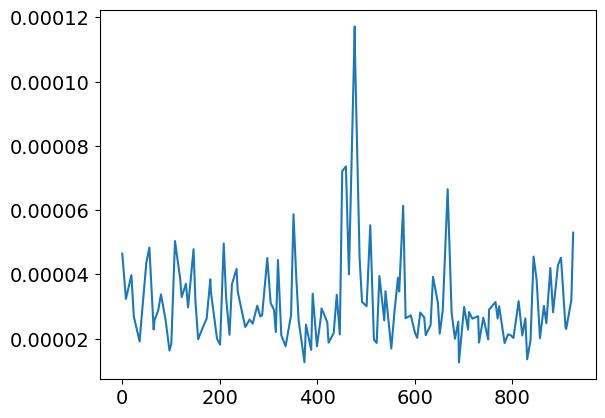

In [5]:
V = np.sqrt(sum(dv**2))
T = t-t[0]

plt.plot(T, V)

In [4]:
v, t, p, n, dt = get_noise_and_peak_from_bin(trace1, times1, bin_size, threshold, noise)

(array([2., 1., 1., 1., 2., 2., 0., 0., 1., 1., 0., 2., 1., 0., 1., 0., 2.]),
 array([ 148.31660929,  199.93425635,  251.55190341,  303.16955047,
         354.78719753,  406.40484459,  458.02249164,  509.6401387 ,
         561.25778576,  612.87543282,  664.49307988,  716.11072694,
         767.728374  ,  819.34602106,  870.96366811,  922.58131517,
         974.19896223, 1025.81660929]),
 <BarContainer object of 17 artists>)

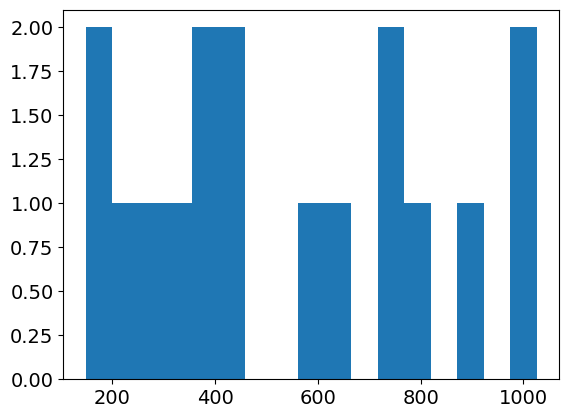

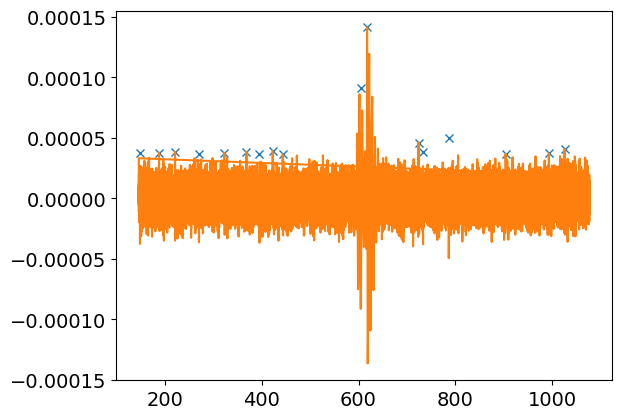

In [10]:
plt.plot(t, v, "x")
plt.plot(times1, trace1)

INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Veff:Trigger names:  None
INFO:Vef

<ErrorbarContainer object of 3 artists>

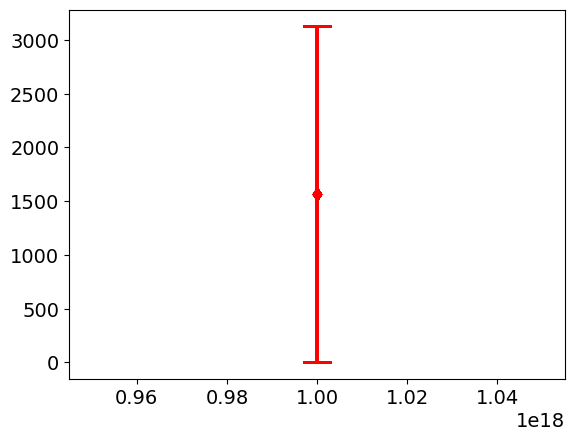

In [18]:

Veff1, Veff_error1, energies1 = get_Veff_data(path1)
plt.errorbar(energies1 / units.eV, Veff1 / units.km ** 3 / units.sr,
            yerr=Veff_error1 / units.km ** 3 / units.sr, fmt='d', capsize = 10, color = "red")


In [ ]:
    # plot effective volume
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.errorbar(energies1 / units.eV, Veff1 / units.km ** 3 / units.sr,
            yerr=Veff_error1 / units.km ** 3 / units.sr, fmt='d', capsize = 10, color = "red")

ax.errorbar(energies2 / units.eV, Veff2 / units.km ** 3 / units.sr,
            yerr=Veff_error2 / units.km ** 3 / units.sr,  fmt='d', capsize = 10, color = "blue")

ax.semilogx(True)
ax.semilogy(True)
ax.set_xlabel(" energy [eV]")
ax.set_ylabel("effective volume [km$^3$ sr]")
fig.tight_layout()
#fig.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.errorbar(energies1 / units.eV, Veff1 / units.km ** 3 / units.sr,
            yerr=Veff_error1 / units.km ** 3 / units.sr, fmt='d')
ax.semilogx(True)
ax.semilogy(True)
ax.set_xlabel(" energy [eV]")
ax.set_ylabel("effective volume [km$^3$ sr]")
fig.tight_layout()
fig.show()

In [ ]:
Veff2, Veff_error2, energies2 = get_Veff_data(path2)


In [ ]:
#trigger efficiency:
MM = np.array([4, 8, 14]) 
MM2 = np.array([67, 98, 196])
Neu = np.array([11, 27, 96]) 
E = np.array([1e18, 1e19, 1e20])

plt.figure(figsize=(10, 10))
plt.plot(E, (MM+MM2)/11000 *100, label = "Monopoles")
plt.plot(E, Neu/1000 *100, label = "Neutrinos")
plt.xscale("log")
#plt.yscale("log")
plt.ylabel("Efficiency [%]")
plt.xlabel("Energy [eV]")
plt.title("Trigger effieciency")
plt.grid()
plt.legend()
plt.show()